# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### YOUR NAME HERE

**Honor Pledge:**  
I pledge on my honor that I, **Goutham Selvakumar**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.1.3'

In [5]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [6]:
# Your package imports here

In [150]:
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Binarizer

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [8]:
df = pd.read_csv('C:/Users/admin/Downloads/gas_emissions.csv')

In [9]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


#### Is there any missing data?

In [10]:
#Checking the missing values in the dataframe
df_miss_val = df.isnull().sum()
print(df_miss_val)

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [11]:
#Getting the avg val of AP 
df.loc[df['CO'] > 3, 'AP'].mean()

1015.690017349063

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

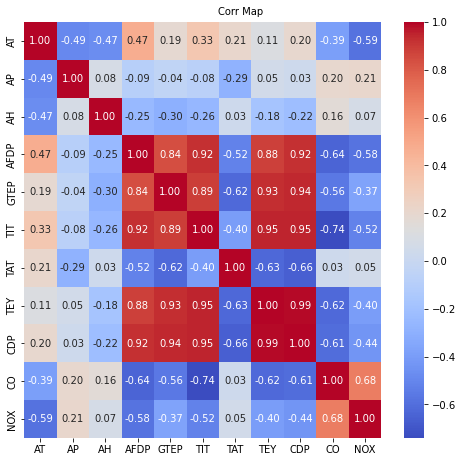

In [12]:
#Plotting the correlation plot for the variables
cor_map = df.corr()
f, ax = plt.subplots(figsize=(8, 7))
#Title
t= f.suptitle('Corr Map', fontsize=10)
hm = sns.heatmap(round(cor_map,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f')
f.subplots_adjust(top=0.95)

The positive correlation that have 0.8 and 0.9 are the AFDP, GTEP, TIT, TEY, CDP.
AFDP variable is considered to have positive correlation with the GTEP, TIT, CDP variables with 0.8.
0.68 is given to the CO and NOX respectively as they have high and positive correlation.

#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot: xlabel='TEY', ylabel='CDP'>

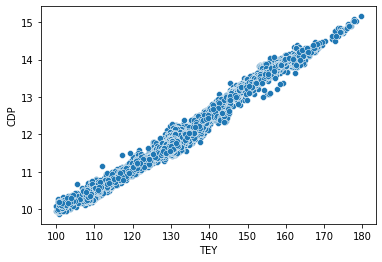

In [13]:
#Plotting the scatter b/w TEY and CDP
sns.scatterplot(data = df, x='TEY', y='CDP')

#### Create histograms for CO and NOX.

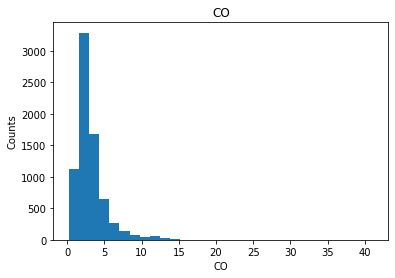

In [14]:
#Plotting the histogram for CO 
plt.hist(df['CO'], density=False, bins=30) 
plt.ylabel('Counts')
plt.xlabel('CO')
#Title
plt.title('CO')
plt.show()

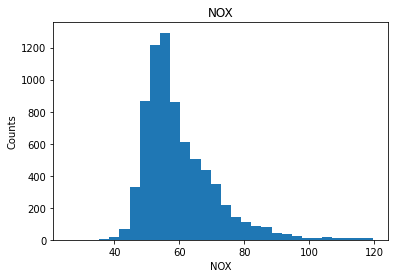

In [15]:
#Plotting the histogram for NOX
plt.hist(df['NOX'], density=False, bins=30) 
plt.ylabel('Counts')
plt.xlabel('NOX')
plt.title('NOX')
plt.show()

#### Create a scatter plot of CO vs NOX.

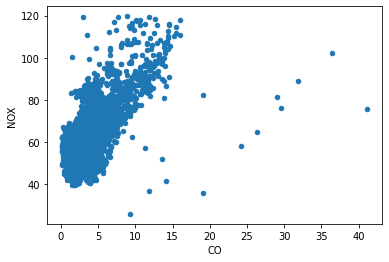

In [16]:
#Scatter Plot of CO vs NOX
df.plot(x='CO', y='NOX', kind='scatter')
plt.show()

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [17]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [19]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [20]:
X_train.shape

(5316, 9)

In [21]:
X_val.shape

(1329, 9)

In [22]:
X_test.shape

(739, 9)

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
#Linear Regression
reg = LinearRegression()

In [25]:
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
#Computing the R2
#Training
pred_train = reg.predict(X_train)
#Validation
pred_val = reg.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.6640090820784397
R2 Score Validation:  0.646343190818214


In [27]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  1.2720122104103535
RMSE for Validation:  1.3884894690085987


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [30]:
#Fitting the RFR
estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [31]:
#Computing the R2
#Training
pred_train = estimator.predict(X_train)
#Validation
pred_val = estimator.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.9635412068046666
R2 Score Validation:  0.7558012206331827


In [32]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  0.419014117669241
RMSE for Validation:  1.1537808394478866


R2 Score and the RMSE score for training and validation have major differences that can say that there is an overfitting problem, so have to try with the best value that we can get from number of estimators.

Number of Estimators

In [33]:
#n_estimators
Est_list = [10, 30, 50, 70, 100, 150]
#Training
#Validation
r2_training = []
r2_validation = []
rmse_validation = []
rmse_training = []
for e in Est_list:
    estimator =  RandomForestRegressor(n_estimators = e , random_state = RANDOM_STATE)
    estimator.fit(X_train, y_train)
    pred_train = estimator.predict(X_train)
    r2_training.append(metrics.r2_score(y_train, pred_train))
    rmse_training.append(sqrt(metrics.mean_squared_error(y_train, pred_train)))
    pred_val = estimator.predict(X_val)
    r2_validation.append(metrics.r2_score(y_val, pred_val))
    rmse_validation.append(sqrt(metrics.mean_squared_error(y_val, pred_val)))

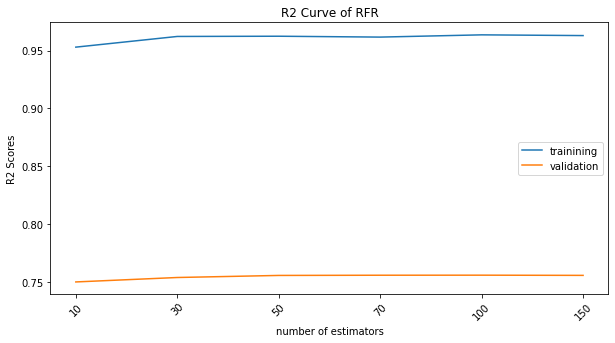

In [34]:
#Plotting the R2 curve
plt.figure(figsize=(10,5))
#Title
plt.title("R2 Curve of RFR")
plt.plot(r2_training, label = 'trainining')
plt.plot(r2_validation, label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('number of estimators')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

Have to do the grid search with n estimators as 50 as the R2 scores are low and have to find the best one 

In [35]:
#N of estimators
Est_list = [50]
#Max
Max_D_list = [2, 5, 10, 15, 20, 30]
#Min
Min_S_list = [10, 30, 50, 100]
params = {'n_estimators': Est_list,
          'min_samples_split': Min_S_list,
         'max_depth': Max_D_list, 'random_state': [42]}
rnd_for = RandomForestRegressor()
grid = GridSearchCV(estimator=rnd_for, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [36]:
#Fitting the grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 30],
                         'min_samples_split': [10, 30, 50, 100],
                         'n_estimators': [50], 'random_state': [42]},
             scoring='r2', verbose=1)

In [37]:
grid.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=100, n_estimators=50,
                      random_state=42)

In [38]:
gs_est= RandomForestRegressor(max_depth=30, min_samples_split=100, n_estimators=50,
                      random_state=42)
gs_est.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=100, n_estimators=50,
                      random_state=42)

In [39]:
#Computing the R2
#Training
pred_train = gs_est.predict(X_train)
#Validation
pred_val = gs_est.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

R2 Score Training:  0.7944721995267191
R2 Score Validation:  0.7468139221274055
RMSE for Train:  0.9948618983320385
RMSE for Validation:  1.1748204256353283


We can see that the overfitting problem have been reduced for R2 and RMSE for both the training and validation.  

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [40]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [41]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [42]:
#Fitting the SVR
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [43]:
#Computing the R2
#Training
pred_train = estimator.predict(X_train)
#Validation
pred_val = estimator.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.6244164650454904
R2 Score Validation:  0.6021524213732284


In [44]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  1.3448714796326715
RMSE for Validation:  1.4726852520481604


From the Linear SVM Regressor we can find out that both the training and validation is not overfitting.

### Polynomial Kernel SVM Regressor

In [45]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [46]:
#Fitting the SVR
estimator.fit(X_train, y_train)

SVR(kernel='poly')

In [47]:
#Computing the R2
#Training
pred_train = estimator.predict(X_train)
#Validation
pred_val = estimator.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.7404852376508417
R2 Score Validation:  0.7310487212257806


In [48]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  1.1179143857689047
RMSE for Validation:  1.2108445318365073


From the Kernel SVM Regressor we can find out that both the training and validation is not overfitting.

### RBF Kernel SVM Regressor

In [49]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [50]:
#Fitting the SVR
estimator.fit(X_train, y_train)

SVR()

In [51]:
#Computing the R2
#Training
pred_train = estimator.predict(X_train)
#Validation
pred_val = estimator.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.7653225070588421
R2 Score Validation:  0.7476173201040636


In [52]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  1.0630733502205558
RMSE for Validation:  1.172955002593975


From the Kernel SVM Regressor we can find out that both the training and validation is not overfitting.

### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
C_list = [1, 10, 100, 1000]
r2_training = []
r2_validation = []
for c in C_list:
    reg = SVR(kernel='rbf', C = c)
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    r2_training.append(metrics.r2_score(y_train, pred_train))
    pred_val = reg.predict(X_val)
    r2_validation.append(metrics.r2_score(y_val, pred_val))

In [55]:
print("R2 Training: ", r2_training)
print("R2 Validation: ", r2_validation)

R2 Training:  [0.7653225070588421, 0.7982615584280004, 0.8273448129323968, 0.8619796049333525]
R2 Validation:  [0.7476173201040636, 0.7537667111495165, 0.7513981936583116, 0.7350960886120681]


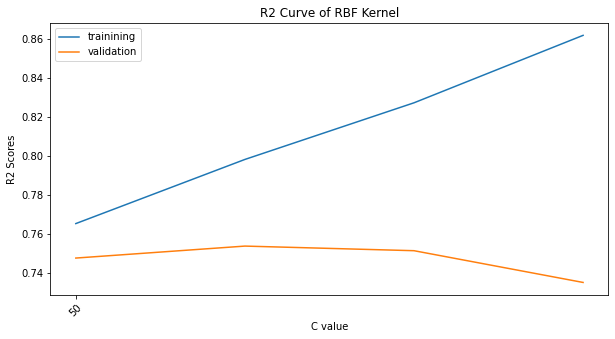

In [56]:
#Plotting the R2 curve
plt.figure(figsize=(10,5))
#Title
plt.title("R2 Curve of RBF Kernel")
plt.plot(r2_training, label = 'trainining')
plt.plot(r2_validation, label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('C value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

70 is considered to be the best C value

In [57]:
#Finding the Gamma Value
gm_list = [0.001, 0.01, 0.1, 1]
r2_training = []
r2_validation = []
for g in gm_list:
    reg = SVR(kernel='rbf', C = 70, gamma = g)
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    r2_training.append(metrics.r2_score(y_train, pred_train))
    pred_val = reg.predict(X_val)
    r2_validation.append(metrics.r2_score(y_val, pred_val))

In [58]:
print("R2 Training: ", r2_training)
print("R2 Validation: ", r2_validation)

R2 Training:  [0.7538534306650755, 0.770206803444538, 0.822000727941415, 0.9192817775112255]
R2 Validation:  [0.7377820842390506, 0.7537565692073624, 0.755207346181423, 0.7012954087821632]


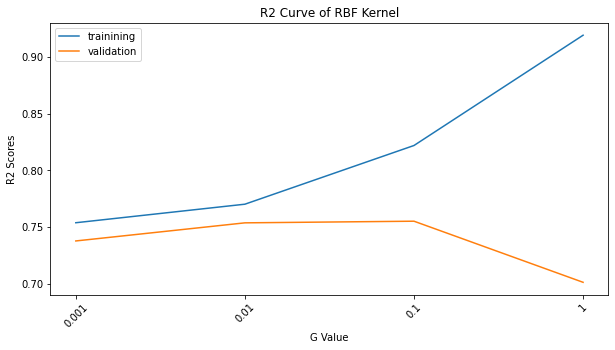

In [59]:
#Plotting the R2 curve
plt.figure(figsize=(10,5))
#Title
plt.title("R2 Curve of RBF Kernel")
plt.plot(r2_training, label = 'trainining')
plt.plot(r2_validation, label = 'validation')
plt.xticks(np.arange(len(gm_list)), gm_list, rotation = 45)
plt.xlabel('G Value')
plt.ylabel('R2 Scores')
plt.legend()
plt.show()

0.01 is considered to be the gamma value and after that it starts to overfit the model. In order to solve this we will be applying the grid search in order to find the best parameters.

In [60]:
#Using the Grid Search
g_v = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}
grid = GridSearchCV(estimator=g_v, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [61]:
#Fitting the grid search
grid.fit(X_train, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


SVR(C=10, gamma=0.1)

In [62]:
gv_reg = SVR(kernel='rbf', C=10, gamma=0.1)
gv_reg.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [63]:
#Computing the R2
#Training
pred_train = gv_reg.predict(X_train)
#Validation
pred_val = gv_reg.predict(X_val)
r2_training = metrics.r2_score(y_train, pred_train)
r2_validation  = metrics.r2_score(y_val, pred_val)
print("R2 Score Training: ", r2_training )
print("R2 Score Validation: ",r2_validation )

R2 Score Training:  0.7964303835059735
R2 Score Validation:  0.754077976844828


In [64]:
#Computing the RMSE
#Training
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
#Validation
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
print("RMSE for Train: ", rmse_training)
print("RMSE for Validation: ",rmse_validation)

RMSE for Train:  0.9901112390759704
RMSE for Validation:  1.157844640187732


From the above result, we can see that the model is not overfitting.   

## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


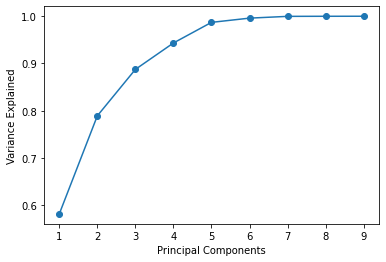

In [67]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [68]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [69]:
reg = LinearRegression()
reg.fit(X_train_pca2, y_train)

LinearRegression()

In [70]:
pred_train = reg.predict(X_train_pca2)
pred_val = reg.predict(X_val_pca2)
#Computing R2
#Training
r2_training = metrics.r2_score(y_train, pred_train)
#Validation
r2_validation = metrics.r2_score(y_val, pred_val)
print("R2 Score of Model", r2_training )
print("R2 Score of Validation",r2_validation)

R2 Score of Model 0.6557906042002006
R2 Score of Validation 0.6333206399655548


In [71]:
#Computing RMSE
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
#Training
print("RMSE of Training", rmse_training)
#Validation
print("RMSE of Validation",rmse_validation)

RMSE of Training 1.2874751982855395
RMSE of Validation 1.4138222446020623


65.5% and 63.3% is given to the R2 score of Model and Validation respectively whereas the RMSE of traning and validation are 1.28 and 1.41. 76.5% and 74.7% was the value for the R2 of RBF in comparison to the 5 PCAs model. However, the RMSE value is higher when compared with the RBF of the previous model.

**RF Regression with PCA transformed data**

In [72]:
rfr = RandomForestRegressor(max_depth=30, min_samples_split=100, n_estimators=50,
                      random_state=42)
rfr.fit(X_train_pca2, y_train)

RandomForestRegressor(max_depth=30, min_samples_split=100, n_estimators=50,
                      random_state=42)

In [73]:
pred_train = rfr.predict(X_train_pca2)
pred_val = rfr.predict(X_val_pca2)
#Computing R2
#Training
r2_training = metrics.r2_score(y_train, pred_train)
#Validation
r2_validation = metrics.r2_score(y_val, pred_val)
print("R2 Score of Model", r2_training )
print("R2 Score of Validation",r2_validation)

R2 Score of Model 0.7956999135579467
R2 Score of Validation 0.721172413512617


In [74]:
#Computing RMSE
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
#Training
print("RMSE of Training", rmse_training)
#Validation
print("RMSE of Validation",rmse_validation)

RMSE of Training 0.9918860590906641
RMSE of Validation 1.2328761403625998


79.5% and 72.1% is the R2 score for the Model and validation whereas the RMSE is considered to be 0.99 and 1.23 respectively. R2 score of this PCA model is higher in comparison to the previous model and RMSE value is considerably lower in comparison with the older model. 

**SVM Regression with PCA transformed data**

In [75]:
reg = SVR(kernel='rbf', C=10, gamma=0.1)
reg.fit(X_train_pca2, y_train)

SVR(C=10, gamma=0.1)

In [76]:
pred_train = reg.predict(X_train_pca2)
pred_val = reg.predict(X_val_pca2)
#Computing R2
#Training
r2_training = metrics.r2_score(y_train, pred_train)
#Validation
r2_validation = metrics.r2_score(y_val, pred_val)
print("R2 Score of Model", r2_training )
print("R2 Score of Validation",r2_validation)

R2 Score of Model 0.7888326441987434
R2 Score of Validation 0.7521975437226653


In [77]:
#Computing RMSE
rmse_training = sqrt(metrics.mean_squared_error(y_train, pred_train))
rmse_validation = sqrt(metrics.mean_squared_error(y_val, pred_val))
#Training
print("RMSE of Training", rmse_training)
#Validation
print("RMSE of Validation",rmse_validation)

RMSE of Training 1.0084187265587043
RMSE of Validation 1.1622629170822418


78.8% and 75.2% are the values of the R2 for the training and validation whereas the RMSE of traning and testing are 1.0 and 1.16 respectively. Furthermore, the R2 score is slightly higher than the older model.

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [139]:
from sklearn.preprocessing import Binarizer

In [140]:
binarizer = Binarizer(threshold=3)

In [141]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [142]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot: >

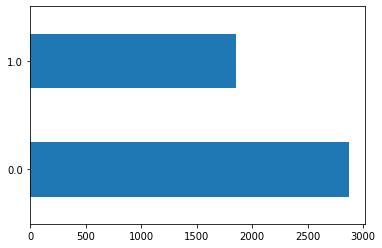

In [143]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [144]:
from sklearn.svm import SVC

In [145]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [146]:
svc = SVC()
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100, 1000]
params = {'C': value,
          'gamma': value,
           'kernel': ['rbf']}
grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [147]:
#Fitting the model
grid.fit(X_train, y_train_cat)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'kernel': ['rbf']},
             verbose=1)

In [87]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [88]:
grid_s_reg = SVC(kernel='rbf', C=100, gamma=0.1)
grid_s_reg.fit(X_train, y_train_cat)

SVC(C=100, gamma=0.1)

In [89]:
#Getting the acccuracy for the training
pred_train = grid_s_reg.predict(X_train)
print("Accuracy Scores for Training",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
#Getting the acccuracy for the validation
pred_val = grid_s_reg.predict(X_val)
print("Accuracy Scores for Validation",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

Accuracy Scores for Training 0.9351015801354402
Accuracy Scores for Validation 0.9194883370955605


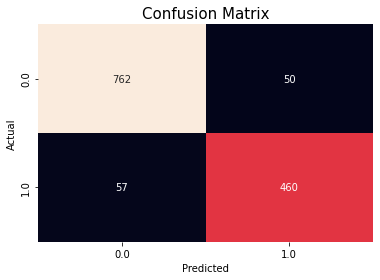

In [90]:
#Plotting the Confusion Matrix
conf_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), 
                           rownames=['Actual'], colnames=['Predicted'])
#Using the sns to plot the seaborn
sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [91]:
#Calculating the performance metrics of the model
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("Performance Metrics")
#Sensitivity
print("Sensitivity %f"%(met['1.0']['recall']))
#Specificity
print("Specificity %f"%(met['0.0']['recall']))
#Precision
print("Precision %f"%(met['1.0']['precision']))
#Accuracy
print("Accuracy %f"%(met['accuracy']))
#F1-Score
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       812
         1.0       0.90      0.89      0.90       517

    accuracy                           0.92      1329
   macro avg       0.92      0.91      0.92      1329
weighted avg       0.92      0.92      0.92      1329

Performance Metrics
Sensitivity 0.889749
Specificity 0.938424
Precision 0.901961
Accuracy 0.919488
F1-score 0.895813


The accuracy, recall, f1-score is similar to that of the default model. Furthermore, the new model is not overfitting.

#### SVC Model 2

In [92]:
#SVC
svc = SVC(kernel = "rbf")
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value,}
grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [93]:
#Fitting the training PCA
grid.fit(X_train_pca2, y_train_cat)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100]},
             verbose=1)

In [94]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [95]:
gs_pca = SVC(kernel='rbf', C=100, gamma=1)
gs_pca.fit(X_train_pca2, y_train_cat)

SVC(C=100, gamma=1)

In [96]:
#Getting the acccuracy for the training
pred_train = gs_pca.predict(X_train_pca2)
print("Accuracy Scores for Training",metrics.accuracy_score(y_true = y_train_cat, y_pred = pred_train))
#Getting the acccuracy for the validation
pred_val = gs_pca.predict(X_val_pca2)
print("Accuracy Scores for Validation",metrics.accuracy_score(y_true = y_val_cat, y_pred = pred_val))

Accuracy Scores for Training 0.9712189616252822
Accuracy Scores for Validation 0.8856282919488337


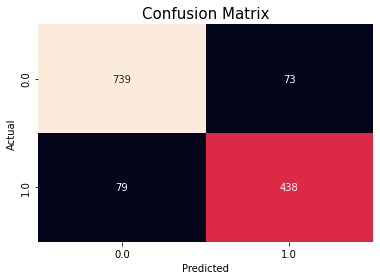

In [97]:
#Plotting the Confusion Matrix
conf_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=pred_val.ravel(), 
                           rownames=['Actual'], colnames=['Predicted'])
#Using the sns to plot the seaborn
sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
#title
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [98]:
#Calculating the performance metrics of the model
print(metrics.classification_report(y_true = y_val_cat, y_pred = pred_val))
met = metrics.classification_report(y_true = y_val_cat, y_pred = pred_val,  output_dict=True)
print("Performance Metrics")
#Sensitivity
print("Sensitivity %f"%(met['1.0']['recall']))
#Specificity
print("Specificity %f"%(met['0.0']['recall']))
#Precision
print("Precision %f"%(met['1.0']['precision']))
#Accuracy
print("Accuracy %f"%(met['accuracy']))
#F1-Score
print("F1-score %f"%(met['1.0']['f1-score']))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       812
         1.0       0.86      0.85      0.85       517

    accuracy                           0.89      1329
   macro avg       0.88      0.88      0.88      1329
weighted avg       0.89      0.89      0.89      1329

Performance Metrics
Sensitivity 0.847195
Specificity 0.910099
Precision 0.857143
Accuracy 0.885628
F1-score 0.852140


Every F1-score, accuracy, Recall are the same for the PCA model in comparison to the default model and SVC model.

## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

First Method - Using the Interquatile Rule

The mean and standard deviation can be changed using the outlier and noise that have the negative impact. So, in order to improve the SVR model, the outliers are removed. The range between the Q1 and Q3 are computed. 

In [99]:
#Using the Inter Quartile Rule 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
#Calculating the range
IQR = Q3 - Q1
print(IQR)

AT      12.611500
AP       8.625000
AH      20.206500
AFDP     1.077525
GTEP     6.871250
TIT     29.400000
TAT      5.282500
TEY     20.905000
CDP      1.682250
CO       1.894375
NOX     12.694250
dtype: float64


In [100]:
#The outliers are removed
#Also a new dataset is formed
upd_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [101]:
#Cleaning the data that has no outliers
#Statistics are also checked
upd_df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000,6152.000000
mean,18.961726,1013.335317,68.036505,3.613334,25.965724,1080.207819,548.105844,133.371824,12.053777,2.701250,57.956808
std,7.291085,5.727596,13.816873,0.562190,3.879969,17.176065,3.189006,13.341493,0.962716,1.276189,8.126079
min,-3.303800,996.760000,29.270000,2.471700,17.972000,1037.200000,536.870000,100.470000,9.935800,0.212900,39.556000
25%,13.381750,1009.100000,58.163500,3.175300,23.388750,1072.900000,546.570000,128.610000,11.571000,1.733975,52.177750
50%,19.277500,1013.100000,70.276000,3.543950,25.299500,1080.300000,549.840000,131.555000,11.936000,2.319000,56.018000
75%,24.634750,1016.900000,79.396500,4.182075,29.734000,1099.700000,550.060000,145.957500,13.061250,3.523125,62.912000
max,36.264000,1031.200000,96.666000,4.901600,38.362000,1100.300000,550.590000,162.400000,13.807000,6.536900,84.120000


In [102]:
#Dataset is resplitted
y__c = upd_df.CO
X__c = upd_df.drop(['CO', 'NOX'], axis=1)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X__c, y__c, 
                                                                            test_size=0.10, random_state=555)
X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(X_train_clean, 
                                                                          y_train_clean, test_size=0.30, random_state=555)

In [103]:
#Standardizing the data
std_scal = StandardScaler()
std_scal.fit(X_train_clean)
#Training
X_train_clean = std_scal.transform(X_train_clean)
#Validation
X_val_clean = std_scal.transform(X_val_clean)
#Testing
X_test_clean = std_scal.transform(X_test_clean)

In [104]:
#GridSearch
reg = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}
grid = GridSearchCV(estimator=reg, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [105]:
grid.fit(X_train_clean, y_train_clean)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


SVR(C=10, gamma=0.1)

In [106]:
#Fitting the best parameters with the RBF Kernel SVR
grid_srch_reg = SVR(kernel='rbf', C=10, gamma=0.1)
grid_srch_reg.fit(X_train_clean, y_train_clean)

SVR(C=10, gamma=0.1)

In [107]:
pred_train = grid_srch_reg.predict(X_train_clean)
pred_val = grid_srch_reg.predict(X_val_clean)
#Computing R2
#Training
r2_training = metrics.r2_score(y_train_clean, pred_train)
#Validation
r2_validation = metrics.r2_score(y_val_clean, pred_val)
print("R2 Score of Model", r2_training )
print("R2 Score of Validation",r2_validation)

R2 Score of Model 0.8282828769540902
R2 Score of Validation 0.8190358303612253


In [108]:
#Computing RMSE
rmse_training = sqrt(metrics.mean_squared_error(y_train_clean, pred_train))
rmse_validation = sqrt(metrics.mean_squared_error(y_val_clean, pred_val))
#Training
print("RMSE of Training", rmse_training)
#Validation
print("RMSE of Validation",rmse_validation)

RMSE of Training 0.5285890270663527
RMSE of Validation 0.5533945625690945


The new model of SVR is showing results that are better in comparison to the other models. Also, the removal of the outliers have also increased the performance of the SVR. The R2 score of the previous model was lower in comparison to the new model that has score of 82.8% and 81.9% respectively. However, the RMSE for training and validation are coinsiderably lower as the older model has higher RMSE value of 1.3 and 1.4 respectively. Also, the new model is not overfitting.

Second Method - PCA size is increased upto 10

The dimensional space will be increased when we increase the number of components. Inreasing the number of PCA upto 10 and using the same dataset that was used in the method 1.

In [109]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [110]:
#Training
X_train_pca2 = X_train_pca[:, 0:10]
#Testing
X_val_pca2 = X_val_pca[:, 0:10]
#Validation
X_test_pca2 = X_test_pca[:, 0:10]

In [111]:
#Gridsearch is performed 
grd_s = SVR(kernel='rbf')
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value}
grid = GridSearchCV(estimator=grd_s, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [112]:
#Fitting the grid search
grid.fit(X_train_pca2, y_train)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


SVR(C=100, gamma=0.0001)

In [113]:
#Fitting the best model
grd_s_reg = SVR(kernel='rbf', C=100, gamma=0.1)
grd_s_reg.fit(X_train_pca2, y_train)

SVR(C=100, gamma=0.1)

In [114]:
#Transforming the data using the PCA and finding the R2 score for the model and validation
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_clean)
X_val_pca = pca.transform(X_val_clean)
#Fitting the GBR 
grd_s_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0)
grd_s_reg.fit(X_train_pca, y_train_clean)

GradientBoostingRegressor(n_estimators=500, random_state=0)

In [115]:
pred_train = grd_s_reg.predict(X_train_pca)
pred_val = grd_s_reg.predict(X_val_pca)
#Computing R2
#Training
r2_training = metrics.r2_score(y_train_clean, pred_train)
#Validation
r2_validation = metrics.r2_score(y_val_clean, pred_val)
print("R2 Score of Model", r2_training )
print("R2 Score of Validation",r2_validation)

R2 Score of Model 0.9144020728448476
R2 Score of Validation 0.8056606805664562


In [116]:
#Computing RMSE
rmse_training = sqrt(metrics.mean_squared_error(y_train_clean, pred_train))
rmse_validation = sqrt(metrics.mean_squared_error(y_val_clean, pred_val))
#Training
print("RMSE of Training", rmse_training)
#Validation
print("RMSE of Validation",rmse_validation)

RMSE of Training 0.3732011432833348
RMSE of Validation 0.5734808617837064


The R2 score of the new model for the training and validation is 91.4% and 80% respectively. The R2 is considered to be higher performance in comparison to the other model.

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [129]:
#The performance metrics is printed for the classification report
def performMetric(my_true, my_pred, printMetric):
    if (printMetric == True):
        print(metrics.classification_report(y_true = my_true, y_pred = my_pred))
    met = metrics.classification_report(y_true = my_true, y_pred = my_pred,  output_dict=True)
    print("Performance Metrics:")
#Sensitivity
    print("Sensitivity %f"%(met['1.0']['recall']))
#Specificity
    print("Specificity %f"%(met['0.0']['recall']))
#Precision
    print("Precision %f"%(met['1.0']['precision']))
#Accuracy
    print("Accuracy %f"%(met['accuracy']))
#F1-Score
    print("F1-score %f"%(met['1.0']['f1-score']))

First method - Feature Selection

The important features are selected in order to improve the SVC and the original datasets are used. The features are evaluated using the ExtraTreesClassifier in which the higher value is important whereas the lower feature values are dropped.

In [148]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train_cat)
imp = model.feature_importances_
feat_importances = pd.Series(imp, index=X.columns)
feat_importances

AT      0.130670
AP      0.049893
AH      0.034839
AFDP    0.192427
GTEP    0.103645
TIT     0.149670
TAT     0.039407
TEY     0.127767
CDP     0.171681
dtype: float64

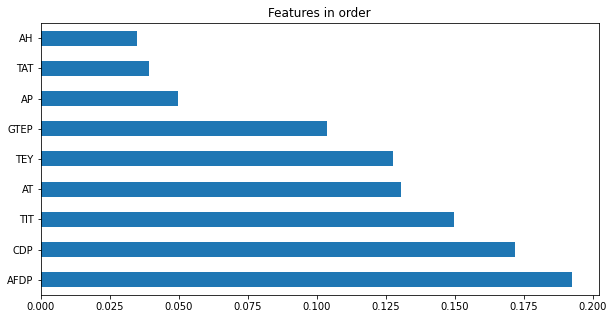

In [149]:
#Plotting the features that are considered to be important
plt.figure(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Features in order")
#Plotting the features
plt.show()

From this plot we can see that the AFDP is the important feature with AH, TAT, and AP with least features. Furthermore, these 3 least features are dropped and the SVC is fitted again.

In [154]:
#Dropping the features that are of least values as well as the target variables
X = upd_df.drop(['AH','TAT', 'AP', 'CO', 'NOX' ], axis=1)
y = upd_df.CO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)
#Standaridizing the data
std_scl = StandardScaler()
std_scl.fit(X_train)
X_train = std_scl.transform(X_train)
X_val = std_scl.transform(X_val)
X_test = std_scl.transform(X_test)
binarizer = Binarizer(threshold=3)
#Fitting the binarized data
#Using the reshape fn to ensure that the i/p data to the binarizer is a 2D array
#Output will be a 1D array of binary
binarizer.fit(y_train.values.reshape(-1, 1))
y_train_cat = binarizer.transform(y_train.values.reshape(-1, 1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1, 1)).ravel()

In [155]:
#Implementing the grid search with the selected features
svc = SVC()
value = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 ,100]
params = {'C': value,
          'gamma': value,
           'kernel': ['rbf']}
grid = GridSearchCV(estimator=svc, param_grid=params, verbose=1, cv=5, n_jobs=-1)

In [156]:
#Fitting the grid search
grid.fit(X_train, y_train_cat)
grid.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


SVC(C=1, gamma=10)

In [157]:
#Fitting the SVC model
grd_src_reg = SVC(kernel='rbf', C=1, gamma=10)
grd_src_reg.fit(X_train, y_train_cat)

SVC(C=1, gamma=10)

In [161]:
#Training accuracy
pred_train = grd_src_reg.predict(X_train)
print("Accuracy Scores of Training",metrics.accuracy_score(y_true = y_train_cat, 
                                                           y_pred = pred_train))
#Validation accuracy
pred_val = grd_src_reg.predict(X_val)
print("Accuracy Scores of Validation",metrics.accuracy_score(y_true = y_val_cat, 
                                                             y_pred = pred_val))
#Printing the performance metrics
performMetric(y_val_cat, pred_val, True)

Accuracy Scores of Training 0.9481290322580646
Accuracy Scores of Validation 0.9048765803732691
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1069
         1.0       0.87      0.87      0.87       592

    accuracy                           0.90      1661
   macro avg       0.90      0.90      0.90      1661
weighted avg       0.90      0.90      0.90      1661

Performance Metrics:
Sensitivity 0.866554
Specificity 0.926099
Precision 0.866554
Accuracy 0.904877
F1-score 0.866554


From the method 1 it's said that the features that were selected improved in performance wise, and accuracy and recall are far better in comparison. 

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [118]:
# YOUR CODE
#Taking the PCA as the best model
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [119]:
#Training
X_train_pca2 = X_train_pca[:, 0:10]
#Testing
X_val_pca2 = X_val_pca[:, 0:10]
#Validation
X_test_pca2 = X_test_pca[:, 0:10]

In [120]:
#The test set performance for each of the model is printed using this fn
def compareRegressor(modelList, x_train, y_train, x_test, y_test):
    r2_list = []
    rmse_list= []
    for m in modelList:
        m.fit(x_train, y_train)
        pred = m.predict(x_test)
        rmse_list.append(sqrt(metrics.mean_squared_error(y_test, pred)))
        r2_list.append(metrics.r2_score(y_test, pred))
    return r2_list, rmse_list

In [121]:
#Initializing the models
l_reg = LinearRegression()
r_reg = RandomForestRegressor(max_depth=30, min_samples_split=50, n_estimators=50, random_state=42)
svr = SVR(kernel='rbf', C=100, gamma=0.1)
#An array of models are created
names = [ "Linear Reg", 
         "Random Reg", 
         "SVR"]
classifiers= [l_reg, r_reg, svr]
r2_lst, rmse_lst = compareRegressor(classifiers, X_train_pca, y_train, X_test_pca, y_test)

In [122]:
df = pd.DataFrame({ "R2": r2_lst, "RMSE": rmse_lst,}, index=names)
print("The test set is summarized for the regression metrics")
df

The test set is summarized for the regression metrics


,R2,RMSE
Linear Reg,0.615179,1.427778
Random Reg,0.707331,1.245145
SVR,0.432715,1.733533


We can see from the table that the random regression which is considered to be better than SVR. Also, the outliers are removed so that the performance have been imporved. We can furthermore see that the accuracy score of the R2 have been slightly reduced by 0.43%.

In [164]:
#Classification Model
#The test set performance for each of the model is printed
def compareClssifier(name,clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, np.ravel(y_train_cat))
    predicted = clf.predict(X_test)
    conf_matrix =  pd.crosstab(index=np.ravel(y_test_cat), columns=predicted.ravel(), 
                                    rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, square=False, fmt='', cbar=False)
    acc = np.round(metrics.accuracy_score(y_test_cat , predicted),3)
    plt.title(name + "  " , fontsize = 15)
    plt.show()
#Printing the performance metrics
    print (metrics.classification_report(y_test_cat,predicted))

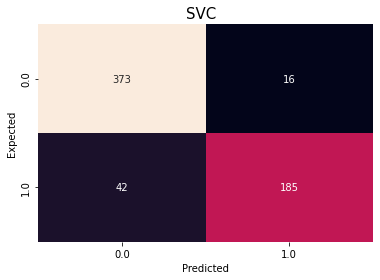

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       389
         1.0       0.92      0.81      0.86       227

    accuracy                           0.91       616
   macro avg       0.91      0.89      0.90       616
weighted avg       0.91      0.91      0.90       616



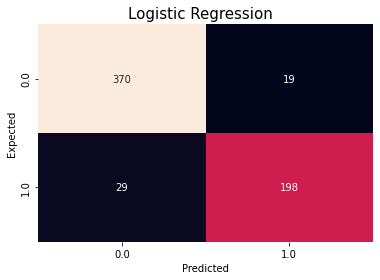

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       389
         1.0       0.91      0.87      0.89       227

    accuracy                           0.92       616
   macro avg       0.92      0.91      0.92       616
weighted avg       0.92      0.92      0.92       616



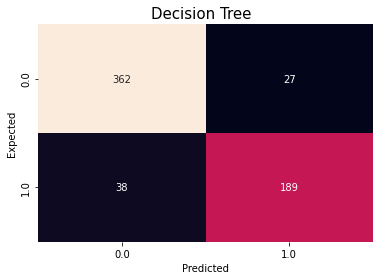

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       389
         1.0       0.88      0.83      0.85       227

    accuracy                           0.89       616
   macro avg       0.89      0.88      0.89       616
weighted avg       0.89      0.89      0.89       616



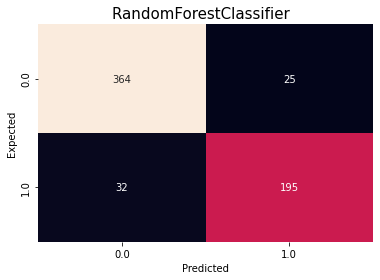

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       389
         1.0       0.89      0.86      0.87       227

    accuracy                           0.91       616
   macro avg       0.90      0.90      0.90       616
weighted avg       0.91      0.91      0.91       616



In [162]:
svc =SVC(kernel='rbf', C=100, gamma=0.01)
#Logistic Regression
log_g = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1)
#Decision Tree
dec_tre = DecisionTreeClassifier(max_depth=5, random_state =42)
#Random Forest
rnd_frst = RandomForestClassifier(n_estimators=400, random_state =42)
#The name of the classifiers are created as an array
names = ["SVC", "Logistic Regression", "Decision Tree", "RandomForestClassifier"]
classifiers= [svc, log_g, dec_tre, rnd_frst]
#The classifiers are looped
for name, clf in zip(names, classifiers):
    compareClssifier(name,clf, X_train, y_train, X_test, y_test)

The accuracy of 92% in the logistic regression is considered to be the highest in comparison to the other models with that of the F1-score also being higher. The prediction between the class 0 and 1 is explained well by all of the models. Since, the outliers are also removed, we can see that the logistic regression, SVC, Random Forest performed well. There is also no overfitting present in all of the models that concludes that the newer models are performing well in comparison to the older model.

- What did you learn in this project? Any suggestions?

# Your comments
I learned about the regression model for the numeric features. I also learned about PCA and implementation of various SVM with kernel and fitted the model. Learned also about the various approach that was feature selection, removing outliers, increasing the size of the PCA.  

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_